In [1]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
features_path = '../data/combined_campaign_features.pth'
features = torch.load(features_path)
features.shape

torch.Size([759632, 384])

/home/jko/miniconda3/envs/torch/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


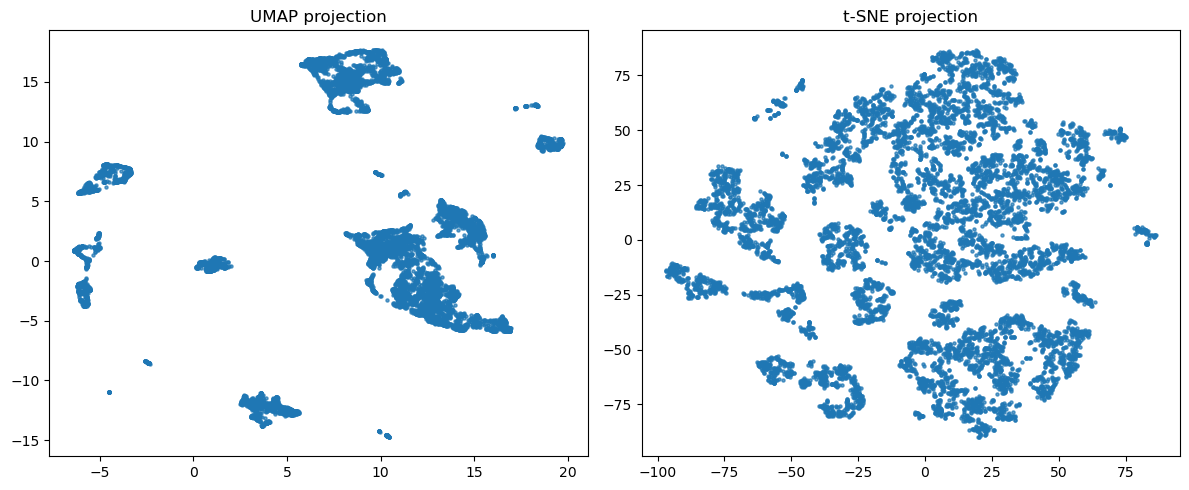

In [9]:
X = features.numpy()
n_samples = 10_000
X_subset = X[np.random.choice(X.shape[0], n_samples, replace=False)]
n_components = 2
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# UMAP
umap_model = umap.UMAP(n_components=n_components, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# t-SNE
tsne_model = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne_model.fit_transform(X_scaled)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_umap[:, 0], X_umap[:, 1], s=5, alpha=0.7)
axes[0].set_title('UMAP projection')
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.7)
axes[1].set_title('t-SNE projection')
plt.tight_layout()
plt.show()

# Basic Unsupervised clustering 

## DBSCAN

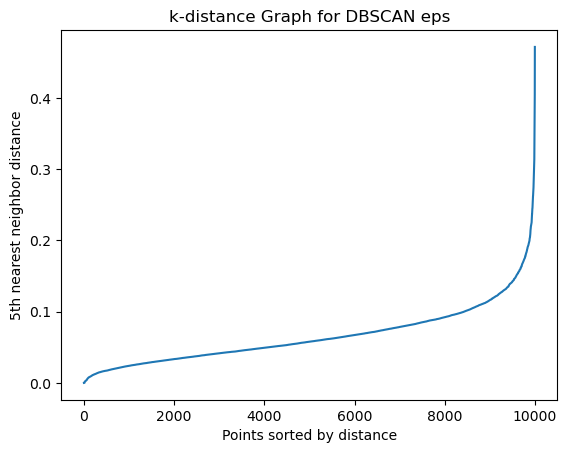

In [26]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  # usually set to min_samples
nbrs = NearestNeighbors(n_neighbors=k).fit(X_umap)
distances, indices = nbrs.kneighbors(X_umap)
k_distances = np.sort(distances[:, k-1])

plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th nearest neighbor distance')
plt.title('k-distance Graph for DBSCAN eps')
plt.show()

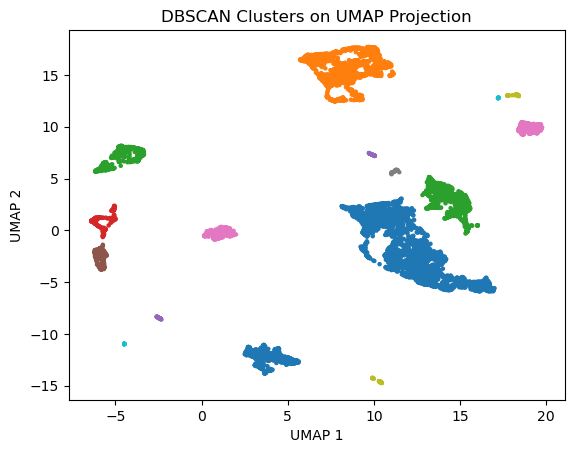

In [33]:
from sklearn.cluster import DBSCAN

# Use UMAP-reduced data for clustering (you can also use X_tsne)
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit_predict(X_umap)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=5)
plt.title('DBSCAN Clusters on UMAP Projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [15]:
X_tsne.shape

(10000, 2)

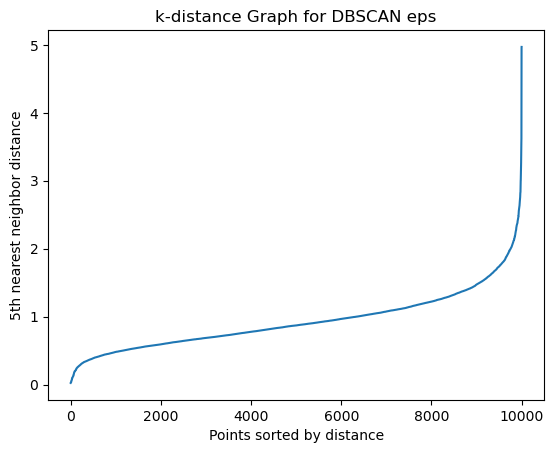

In [29]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  # usually set to min_samples
nbrs = NearestNeighbors(n_neighbors=k).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)
k_distances = np.sort(distances[:, k-1])

plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th nearest neighbor distance')
plt.title('k-distance Graph for DBSCAN eps')
plt.show()

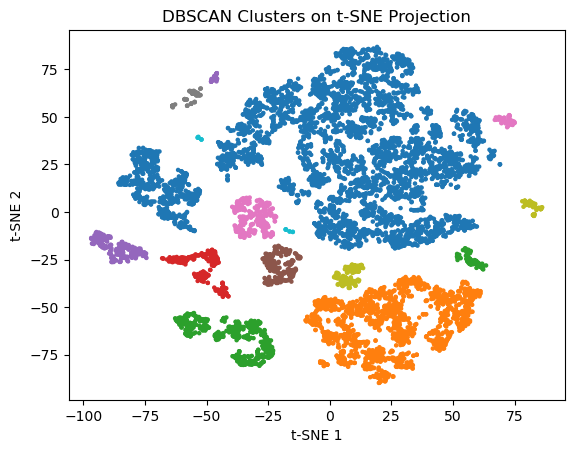

In [30]:
from sklearn.cluster import DBSCAN

# Use tsne-reduced data for clustering
clustering = DBSCAN(eps=5, min_samples=5)
labels = clustering.fit_predict(X_tsne)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=5)
plt.title('DBSCAN Clusters on t-SNE Projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## Mean Shift

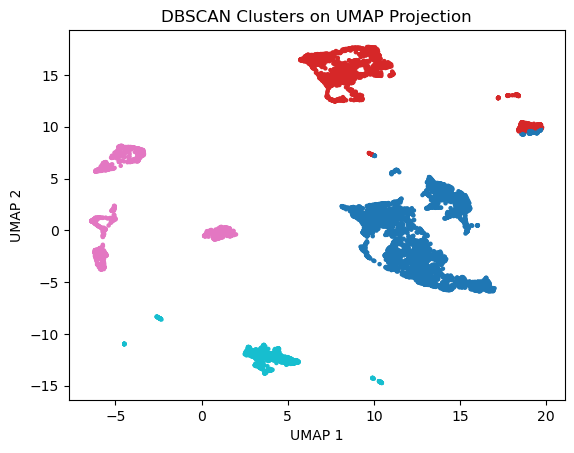

In [34]:
from sklearn.cluster import MeanShift

# Use UMAP-reduced data for clustering
meanshift = MeanShift()
labels = meanshift.fit_predict(X_umap)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=5)
plt.title('Mean Shift Clusters on UMAP Projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

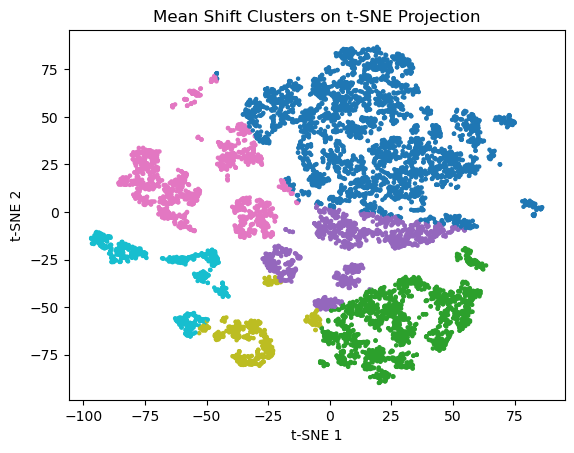

In [38]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Use UMAP-reduced data for clustering
bandwidth = estimate_bandwidth(X_tsne, quantile=0.1, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth)
labels = meanshift.fit_predict(X_tsne)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=5)
plt.title('Mean Shift Clusters on t-SNE Projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## Hierarchical (Agglomerative) Clustering

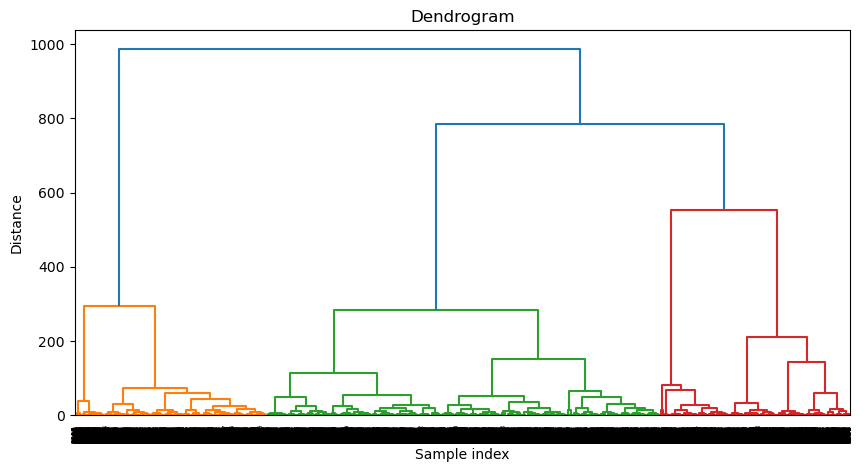

In [41]:
# Dendogram for UMAP features
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_umap, method='ward')  # or 'average', 'complete', etc.
plt.figure(figsize=(10, 5))
dendrogram(Z)
# plt.axhline(y=desired_threshold, color='r', linestyle='--')  # Optional: visualize a threshold
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

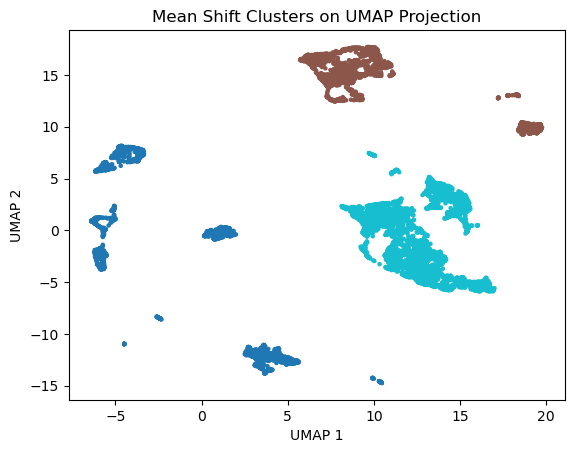

In [42]:
# UMAP
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(distance_threshold=700.0, n_clusters=None)
labels = agg.fit_predict(X_umap)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=5)
plt.title('Mean Shift Clusters on UMAP Projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

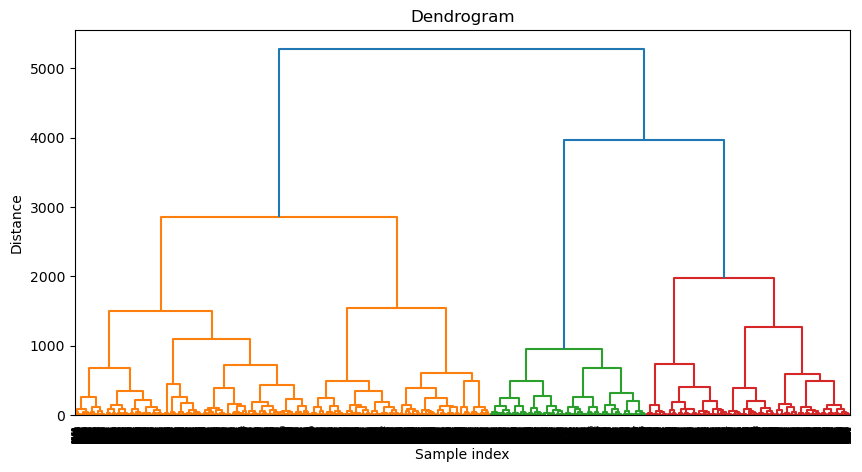

In [43]:
# Dendogram for t-SNE features
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_tsne, method='ward')  # or 'average', 'complete', etc.
plt.figure(figsize=(10, 5))
dendrogram(Z)
# plt.axhline(y=desired_threshold, color='r', linestyle='--')  # Optional: visualize a threshold
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

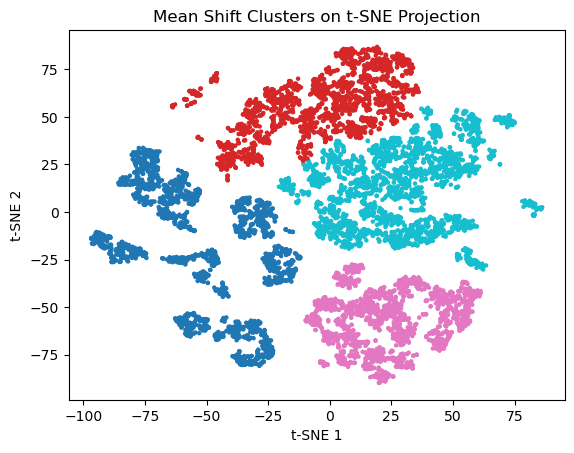

In [44]:
# t-SNE
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(distance_threshold=2000.0, n_clusters=None)
labels = agg.fit_predict(X_tsne)

# Plot clusters
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=5)
plt.title('Mean Shift Clusters on t-SNE Projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()